In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as skm
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
data = df.values

#df_5_6 = df.loc[df['quality'].isin([5, 6])]
#y = df_5_6.quality
#X = df_5_6.drop(['quality'],axis=1)

y = df.quality
y -= 3
X = df.drop(['fixed acidity', 'quality'],axis=1)

# Apply PCA
#pca = PCA(n_components=9)
#X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.3, stratify=y, random_state=42)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
k = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
best_acc = 0.0
best_k = 1
best_metric = 'cityblock'
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']
for metric in metrics:
    for j in k:
        knn = KNeighborsRegressor(n_neighbors=j, metric=metric, weights='distance', algorithm='brute')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        y_pred = np.around(y_pred)
        accuracy_test = accuracy_score(y_test, y_pred)
        if accuracy_test > best_acc:
            best_acc = accuracy_test
            best_k = j
            best_metric = metric
print(f'test acc = {best_acc*100}%')
print(f'k = {best_k}')
print(f'metric = {best_metric}')

test acc = 68.75%
k = 17
metric = cosine


In [12]:
knn = KNeighborsRegressor(n_neighbors=best_k, metric=best_metric, weights='distance', algorithm='brute')
knn.fit(X_train, y_train)
y_pred_test_raw = knn.predict(X_test)
y_pred_test = np.around(y_pred_test_raw)

In [13]:
misclassed_label = []
misclassed_output = []
y_test = y_test.to_numpy()
for i in range(len(y_test)):
    if y_pred_test[i] != y_test[i]:
        misclassed_label.append(y_test[i])
        misclassed_output.append(y_pred_test_raw[i])
misclassed_label = np.array(misclassed_label)
misclassed_output = np.array(misclassed_output)

Text(0.5, 1.0, 'histogram of quality misclassified instances in test set')

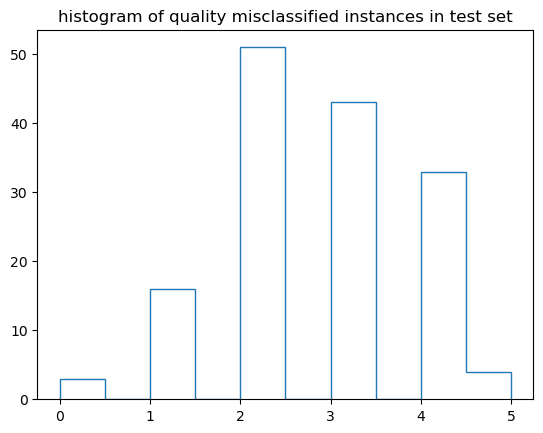

In [14]:
counts, bins = np.histogram(misclassed_label)
plt.stairs(counts, bins)
plt.title('histogram of quality misclassified instances in test set')

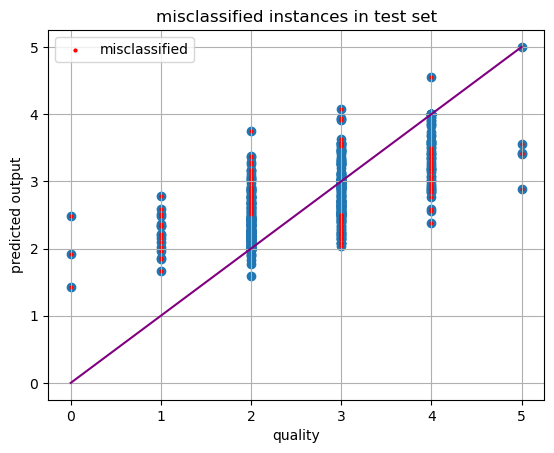

In [15]:
plt.scatter(y_test, y_pred_test_raw)
plt.scatter(misclassed_label, misclassed_output, color='red', s=4, label='misclassified')
plt.plot([0, 1, 2, 3, 4, 5], color='purple')
plt.grid()
plt.title('misclassified instances in test set')
plt.ylabel('predicted output')
plt.xlabel('quality')
plt.legend()
plt.show()